In [1]:
## IRIS FLOWER CLASSIFICATION  ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
X = iris.data  # Feature matrix containing the measurements
y = iris.target  # Target array containing the species
feature_names = iris.feature_names
target_names = iris.target_names

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


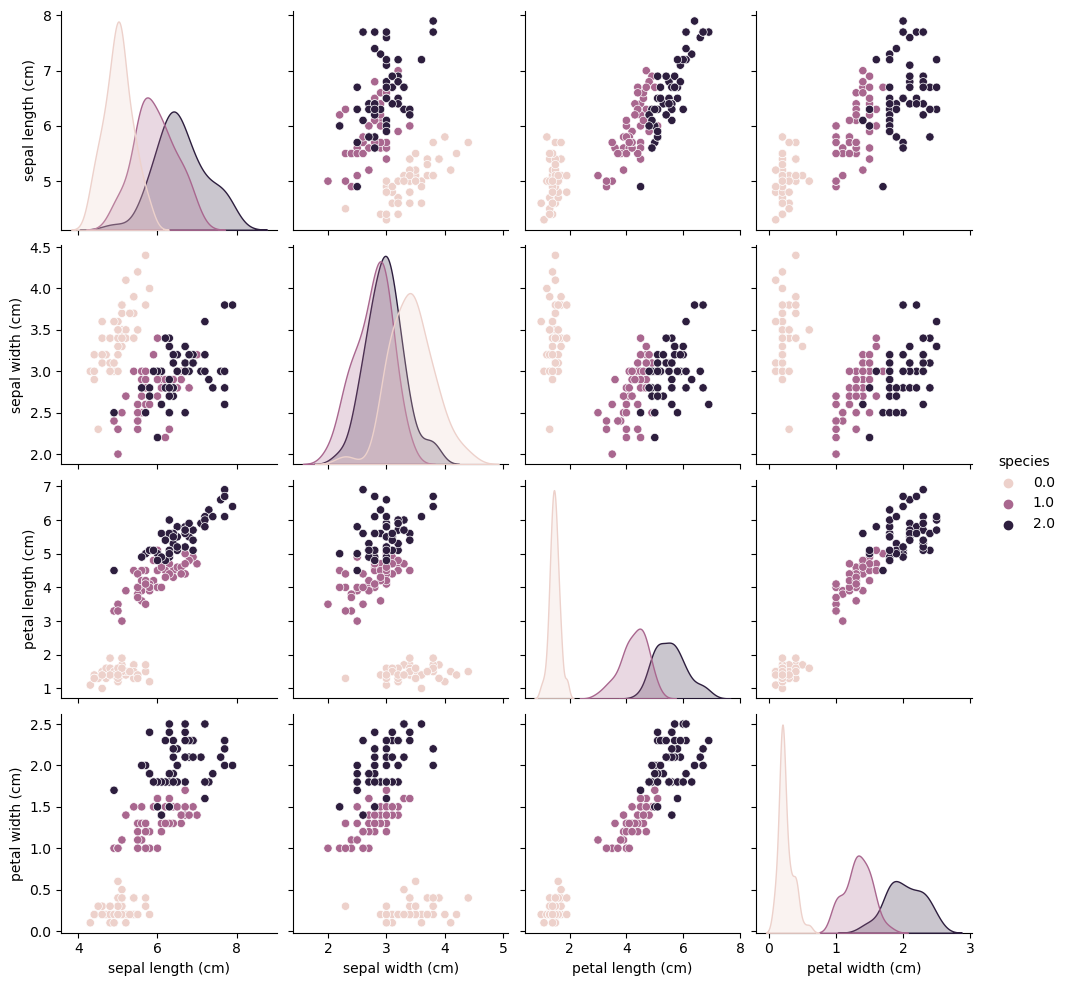

In [2]:
# Data visualization to understand the dataset better
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(np.c_[X, y], columns= np.append(feature_names, ['species'])), hue="species")
plt.show()
# Load the dataset
# Replace 'path_to_your_iris_dataset.csv' with the actual path to the Iris dataset CSV file
import pandas as pd

df = pd.read_csv('C:\\Users\\maham\\Desktop\\iris.csv')


In [3]:
# Preview the dataset
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Prepare the data
X = df.drop('Species', axis=1)  # Features: sepal length, sepal width, petal length, petal width
y = df['Species']  # Target: species

In [5]:
# Encode the target variable (species) to integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [7]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



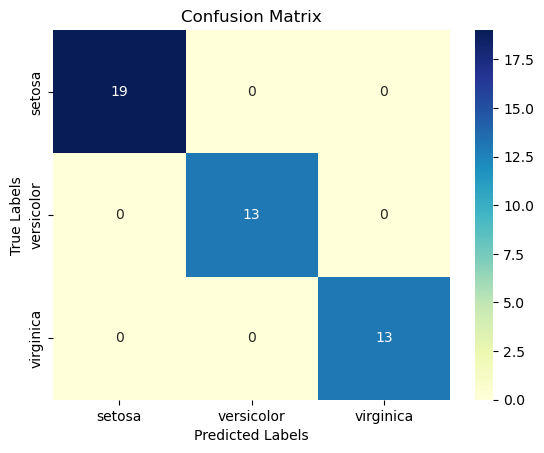

In [9]:
# Additional: Model performance visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()